In [1]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.backends.backend_pdf as pltBack
import matplotlib.lines as lines
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy
from optparse import OptionParser
import os
import sys
import complexHilbertCurve

D:\python\Anaconda2\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
##---------------d2xy_ab------------------------
def hcindex2xy_ab(N,hcindex):

    assert(hcindex <= N**2 - 1)
    positions = ([0,0],[1,0],[1,1],[0,1]) #tuple

    #The last two corresponds to which point of posotions
    last2bits     = hcindex & 3
    cor_position  = positions[last2bits]
    x = cor_position[0]
    y = cor_position[1]

    subsuqarebits = hcindex>>2 # cooresponding to the subsuqare
    m = 4 # because the first four points have been given,so start from 4
    while(m <= N):
          m2 = m/2
          case = subsuqarebits & 3 # take the last two bits
    # in the  quadrant named zero,do flip
          if case == 0:
              tmp = x
              x   = y
              y   = tmp
    # in the quadrant named one,do transformation
          elif case == 1:
              x   = x + m2 # keep x unchanged
    # in the quadrant named two,do another transformation
          elif case == 2:
              x  = x + m2
              y  = y + m2
    # in the quadrant named three, do rotation around y=-x and transformation
          elif case == 3:
              temp = y
              y    = m2 -1-x
              x    = m2 -1-temp
              y    = y + m2
    # default case
          else:
              print 'The last2bits:',case,' is not anyone of [0,1,2,3]'
              sys.exit('last2bits error')

          subsuqarebits = subsuqarebits>>2 # case /=4,remove the last two bits
          m   *= 2 # iteration,grow 2 times on one direction
    return x,y
#################################################

#-------------------hcindex2xy_ba------------------------------------
def hcindex2xy_ba(n,hcindex):
    x,y = hcindex2xy_ab(n,n**2-1-hcindex)
    y   = -y #force the vertex B to be (0,0) by reflecting
    return x,y
########################################################################
def hcindex2xy_dc(n,hcindex):
    x,y = hcindex2xy_ab(n,hcindex)
    x   = -x # reflect about the axial AB,x = 0
    return x,y


In [5]:
N=3
n=2**N
x = numpy.zeros(n**2, dtype=numpy.int16)
y = numpy.zeros(n**2, dtype=numpy.int16)

In [6]:
for i in xrange(0, n**2):
       x[i],y[i] =hcindex2xy_ab(n,i)

In [8]:
plt.subplot(221)
plt.plot(x, y)
plt.title('AB')


In [10]:
xx = numpy.zeros(n**2,dtype=numpy.int16)
yy = numpy.zeros(n**2,dtype=numpy.int16) 
for i in xrange(0,n**2):
    xx[i],yy[i]=hcindex2xy_ba(n,i)
plt.subplot(222)
plt.plot(xx,yy)
plt.title('BA')


In [11]:
xxx = numpy.zeros(n**2,dtype=numpy.int16)
yyy = numpy.zeros(n**2,dtype=numpy.int16) 
for i in xrange(0,n**2):
    xxx[i],yyy[i]=hcindex2xy_dc(n,i)
plt.subplot(223)
plt.plot(xxx,yyy)
plt.title('DC')

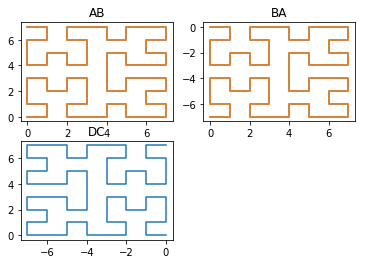

In [12]:
plt.show()